In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("loan_approved.csv")

## Basic Checks

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## Checking for Outliers

<Axes: ylabel='LoanAmount'>

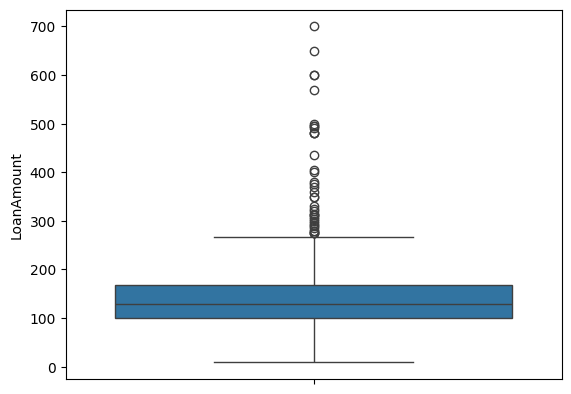

In [9]:
sns.boxplot(df.LoanAmount)

<Axes: ylabel='ApplicantIncome'>

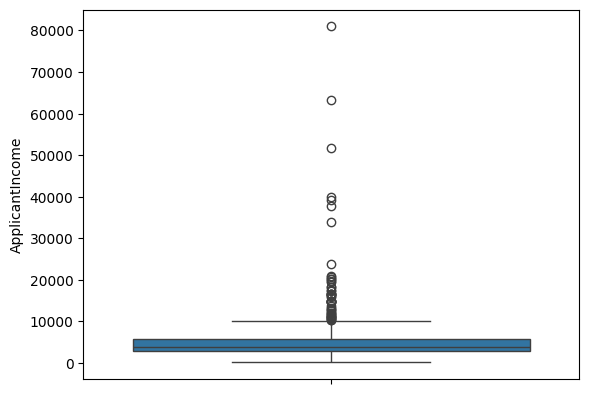

In [11]:
sns.boxplot(df.ApplicantIncome)

<Axes: ylabel='CoapplicantIncome'>

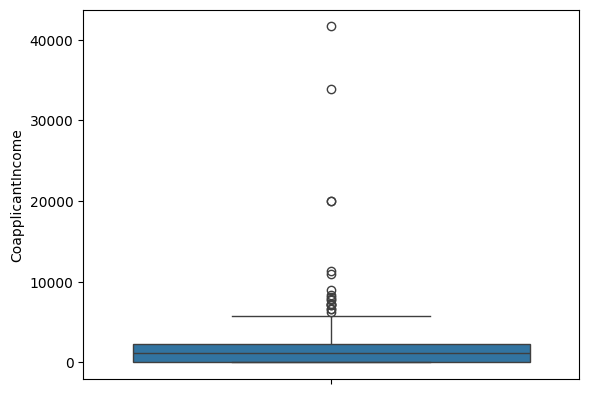

In [12]:
sns.boxplot(df.CoapplicantIncome)

## Data Cleaning
- I see that the outliers are possibly a part of distribution, since extreme values are quite probable in these kind of features. So outliers are not being removed.
- Handling null values is being done.

In [13]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

In [14]:
df.Gender.unique()[0]

'Male'

In [16]:
#Fixing null values
df.loc[df['Gender'].isnull(),'Gender'] = df.Gender.unique()[0]
df.loc[df['Married'].isnull(),'Married'] = df.Married.unique()[0]
df.loc[df['Dependents'].isnull(),'Dependents'] = '0'       # Can also be replaced with df.Dependents.unique()[0]
df.loc[df['Self_Employed'].isnull(),'Self_Employed'] = df.Self_Employed.unique()[0]
df.loc[df['LoanAmount'].isnull(),'LoanAmount'] = df.LoanAmount.mean()
df.loc[df['Loan_Amount_Term'].isnull(),'Loan_Amount_Term'] = df.Loan_Amount_Term.unique()[0]
df.loc[df['Credit_History'].isnull(),'Credit_History'] = df.Credit_History.unique()[0]

In [17]:
df.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

<Axes: >

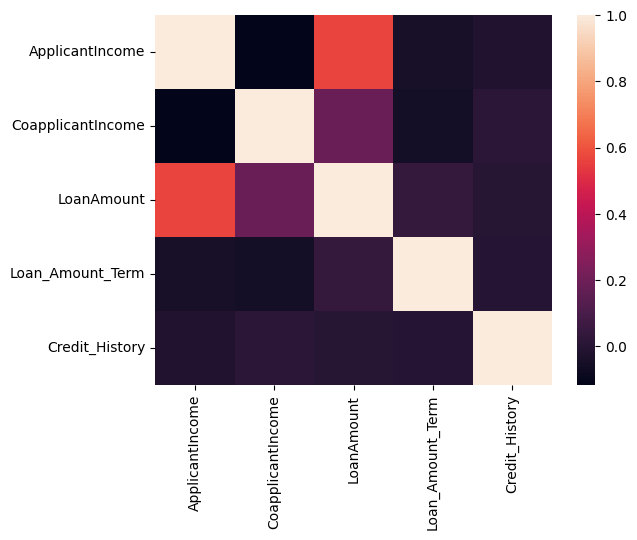

In [18]:
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr())

In [43]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

### Steps of preprocesing for features:
- LabelEncoding for Married
- OrdinalEncoder for Dependents,Education
- One hot encoder for Self Employed,Property_area,Gender
- FunctionTransformer for Loan_Amount_term
- Standard scaler for Applicant Income, CoapplicantIncome and LoanAmount
- Credit histroy will pass through
### Steps of preprocessing for Target/Label
- LabelEncoder for Loan_Status (Approved)

In [19]:
df.Credit_History.unique()

array([1., 0.])

In [20]:
OHE_col=['Self_Employed','Property_Area','Gender']
ss_col=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
function_trasformer_col=["Loan_Amount_Term"]
pass_through_col=['Credit_History']
#we need to define ordinalencoder seperately for every column if we have to define the order of categories
dependents_enc = OrdinalEncoder(categories=[['0', '1', '2', '3+']])
education_enc = OrdinalEncoder(categories=[['Not Graduate','Graduate']])
OE = ['Married']

In [21]:
def div_by_30(x):
    return x/30
custom = FunctionTransformer(div_by_30)

In [23]:
def same(x):
    return x
passthru = FunctionTransformer(same)

In [24]:
preprocessor = ColumnTransformer([('OHE',OneHotEncoder(),OHE_col),
                                  ('SS',StandardScaler(),ss_col),
                                  ('FT',custom,function_trasformer_col),
                                  ('OE',OrdinalEncoder(),OE),
                                  ('do_nothing',passthru,pass_through_col),
                                  ('OE1',dependents_enc,['Dependents']),
                                  ('OE2',education_enc,['Education']),
                                  ])

In [25]:
preprocessor

ColumnTransformer(transformers=[('OHE', OneHotEncoder(),
                                 ['Self_Employed', 'Property_Area', 'Gender']),
                                ('SS', StandardScaler(),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount']),
                                ('FT',
                                 FunctionTransformer(func=<function div_by_30 at 0x00000211A6DF44C0>),
                                 ['Loan_Amount_Term']),
                                ('OE', OrdinalEncoder(), ['Married']),
                                ('do_nothing',
                                 FunctionTransformer(func=<function same at 0x00000211BB97F0A0>),
                                 ['Credit_History']),
                                ('OE1',
                                 OrdinalEncoder(categories=[['0', '1', '2',
                                                             '3+']]),
                                 ['Dependents']),
                                ('OE2',
                                 OrdinalEncoder(categories=[['Not Graduate',
                                                             'Graduate']]),
                                 ['Education'])])

In [26]:
with open('SVM_CT.pkl','wb') as f:
    pickle.dump(preprocessor,f)

In [28]:
pwd

'C:\\Users\\LENOVO\\cds\\HV\\MLE'

In [27]:
ls

 Volume in drive C has no label.
 Volume Serial Number is E25B-F2F8

 Directory of C:\Users\LENOVO\cds\HV\MLE

06-10-2025  10:58    <DIR>          .
06-10-2025  10:58    <DIR>          ..
25-09-2025  10:46    <DIR>          .ipynb_checkpoints
23-09-2025  09:17    <DIR>          __pycache__
23-08-2025  07:15               772 custom_functions.py
23-08-2025  07:14            72,776 Feature_engineering_and_PCA_Class.ipynb
23-08-2025  07:17           227,977 HR.csv
23-08-2025  07:14            38,669 Loading_from_pickle_titanic.ipynb
23-08-2025  07:15            38,022 loan_approved.csv
25-09-2025  11:02            27,187 Naive_Bayes.ipynb
23-08-2025  07:21               544 preprocessing.py
23-09-2025  09:44            53,932 Processed_data.pkl
25-09-2025  09:17           284,124 Processed_data_HR.pkl
23-08-2025  07:21               544 processing_data.py
23-08-2025  07:17           483,636 spam.csv
23-08-2025  07:17           477,256 spam.tsv
06-10-2025  10:59             1,356 SVM_CT.pk

In [51]:
with open('Processed_data.pkl','wb') as f:
    pickle.dump(df,f)

In [52]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y
